In [ ]:
import torch.nn as nn
import torch
import numpy as np
import torch.optim as optim
import pandas as pd
from scipy.signal import savgol_filter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.preprocessing import Normalizer

In [ ]:
def select_data(x, y, threshold):
    y_spl = UnivariateSpline(x,y,s=0,k=4)
    y_spl_2d = y_spl.derivative(n=2)
    x_reverse = np.array(list(reversed(x)))
    weight = np.array([((x + 1) / len(x_reverse)) for x in x_reverse]) / y[-1]
    smooth_2d = savgol_filter(y_spl_2d(x).reshape(-1), 13, degree)
    smooth_2d = [[x] for x in smooth_2d]
    final = smooth_2d * weight
    idx = -1
    res = []
    while(final[idx] <= threshold):
        res.append(y[idx])
        idx -= 1
    return list(reversed(res))

In [ ]:
degree = 3
alpha = .1
window = 21
state = 'Kansas'
feature = 'Confirmed'
start = 0
traindf = pd.read_csv("data/train.csv")
threshold = 0.0001

FileNotFoundError: ignored

In [ ]:
ds = pd.read_csv('data/train.csv')
ds = ds[ds['Province_State'] == state]
value = ds[feature].values
value = savgol_filter(value.reshape(-1), window, degree)
combine = [[value[i]] for i in range(len(value))]

y = np.array([value[start:]]).reshape(-1, 1)
x = [[i + start] for i in range(142-start)]

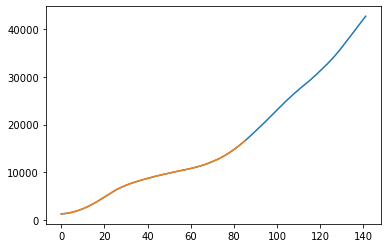

In [ ]:
plt.plot(y)
selected_data = select_data(x, y, threshold)
plt.plot(y[:-len(selected_data)])

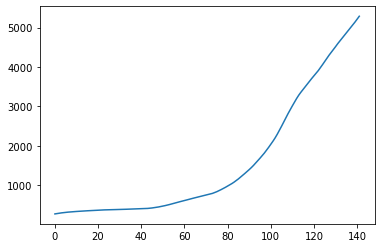

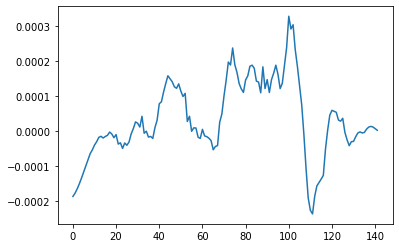

In [ ]:
y_spl = UnivariateSpline(x,y,s=0,k=4)
plt.plot(x, y)
plt.show()
y_spl_2d = y_spl.derivative(n=2)
x_reverse = np.array(list(reversed(x)))
weight = np.array([((x + 1) / len(x_reverse)) for x in x_reverse]) / y[-1]
smooth_2d = savgol_filter(y_spl_2d(x).reshape(-1), 13, degree)
smooth_2d = [[x] for x in smooth_2d]
plt.show()
plt.plot(x, smooth_2d * weight)